<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20070_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E/20/070 - DILSHAN H.A.L.L.

Activity 1 - Derivation oF 2-DOF Model that will Capture the First Two Dominant Modes of Small Amplitude Vibration of the System

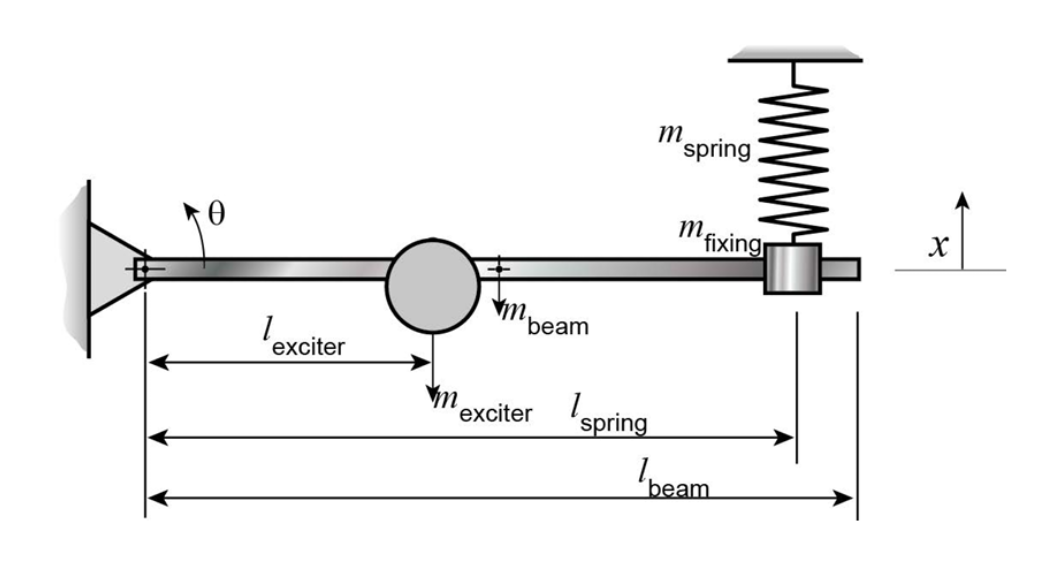

The Euler-Bernoulli beam theory models small-amplitude transverse vibrations of a slender beam as a continuous system using the following partial differential equation:

$$
\rho A \frac{\partial^2 y}{\partial t^2} + c \frac{\partial y}{\partial t} + EI \frac{\partial^4 y}{\partial x^4} + P \frac{\partial^2 y}{\partial x^2} = f(t,x)
$$

In this equation:
- $\rho$ represents the material density
- $A$ denotes the cross-sectional area of the uniform beam
- $E$ is the elastic modulus
- $I$ is the second moment of area of the cross-section
- $c$ represents the viscous damping coefficient distributed along the beam length
- $P$ denotes the axial compressive load
- $f(t,x)$ is the distributed transverse loading per unit length

Since $P = 0$ for this case, the above PDE can be reduced to:

$$
{\rho A}{{\partial^2 y} \over {\partial t^2}} + c{{\partial y} \over {\partial t}}+EI{{\partial^4 y} \over {\partial x^4}}=f(t,x)
$$


The solutions of the above PDE that satisfy the boundary conditions of a pinned-free beam.

\begin{align*}y(0,t)&=0,\:\:\:\:\:\:\: {\partial^3 y \over \partial x^3}(l_{beam},t)=0,\\{\partial^2 y \over \partial x^2}(0,t)&=0,\:\:\:\:\:\:\: {\partial^2 y \over \partial x^2}(l_{beam},t)=0,\end{align*}

where $k_{\theta} = k_{spring}l_{spring}^2$ is the rotational stiffness

**Free Vibration Analysis for Mode Shapes:**

Let $\mathfrak{F}$ be the infintie dimensional vector space of twice differentiable functions defined on the interval $[0,L]$. Then $H: \mathfrak{F}\mapsto \mathfrak{F}$ defined by

\begin{align}H&=\frac{EI} {\rho A}{{\partial^4 } \over {\partial x^4}}
\end{align}

is a linear operator on $\mathfrak{F}$ and the equations of motion take the form

\begin{align*}
{{\partial^2 y} \over {\partial t^2}} + C{{\partial y} \over {\partial t}}+Hy&=q(t,x)
\end{align*}

where $c = C \rho A$ and $f(t) = \rho A q(t)$

$H$ maps a transverse deflection shape to the acceleration caused purely by beam bending, subject to the beam’s boundary conditions. Let $H$ have distinct positive eignevalues $\{\omega_k^2\}_{k=1}^\infty$ with corrsponding eigenvectors $\{\psi_k\}_{k=1}^\infty$ i.e. mode shapes.

Then, the eigenvalue problem can be defined as:

\begin{align*}
H \psi_k(x) &= \omega_k^2 \psi(x)
\end{align*}

Substituting $(1)$, we get:

\begin{align*}
\frac{EI}{\rho A} \frac{\partial^4 \psi_k(x)}{\partial x^4} &= \omega_k^2 \psi_k(x) \\
\frac{\partial^4 \psi_k(x)}{\partial x^4} &= \frac{\rho A \, \omega_k^2}{EI} \psi_k(x)  \\
\frac{\partial^4 \psi_k(x)}{\partial x^4} &= \beta_k^4 \psi_k(x)
\end{align*}

where $\beta_k^4 = \frac{\rho A \, \omega_k^2}{EI}$

The solution to the fourth-order differential equation (1) takes the form:

\begin{align*}
\psi_k(x) = A_k \cosh(\beta_k x) + B_k \sinh(\beta_k x) + C_k \cos(\beta_k x) + D_k \sin(\beta_k x)
\end{align*}

The constants $A_k$, $B_k$, $C_k$, and $D_k$ are obtained by applying appropriate boundary conditions.

At the fixed base ($x = 0$):

$$
\psi_k(0) = 0 \quad \Rightarrow \quad A_k + C_k = 0
$$

<br>

Taking derivatives:

\begin{align*}
\psi_k'(0) &= \beta_k(B_k+D_k) \\
\psi_k''(0) &= \beta_k^2(A_k-C_k)
\end{align*}

Since $C_k = -A_k$, substituting into the rotational spring boundary condition yields:

\begin{align*}
EI \beta_k^2(A_k-C_k) - k_{\theta}\beta_k(B_k+D_k) &= 0 \\
2EI \beta_k^2A_k - k_{\theta}\beta_k(B_k+D_k) &= 0
\end{align*}

At the free end ($x = l_{beam}$):

\begin{align*}
\psi_k''(l_{beam}) = 0 & \Rightarrow
& A_k(\cosh(\beta_k l_{beam}) + \cos(\beta_k l_{beam})) + B_k\sinh(\beta_k l_{beam}) - D_k\sin(\beta_k l_{beam})  = 0 \\
\psi_k'''(l_{beam}) = 0 & \Rightarrow
& A_k(\sinh(\beta_k l_{beam}) - \sin(\beta_k l_{beam})) + B_k\cosh(\beta_k l_{beam}) - D_k \cos(\beta_k l_{beam}) = 0
\end{align*}

<br>

These three conditions can be expressed as a homogeneous linear system:

$$
\mathbf{H}(\beta_k)\begin{bmatrix} A_k \\ B_k \\ D_k \end{bmatrix} = \mathbf{0}
$$

where $\mathbf{H}(\beta_k)$ is a $3 \times 3$ matrix.

Non-trivial solutions exist when $\text{det}\,\mathbf{H}(\beta_k) = 0$. We solve this characteristic equation numerically to determine the eigenvalues $\beta_k$ for each mode $k$, then solve the homogeneous system to obtain the corresponding coefficients $A_k$, $B_k$, and $D_k$.

In [ ]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
import scipy.optimize as opt
import scipy.integrate as integrate
import matplotlib.pyplot as plt


In [ ]:
# Characteristic Determinant Calculation
def compute_characteristic_determinant(beta, beam_length, flexural_rigidity, spring_stiffness):
    """
    Calculate the determinant of the characteristic matrix for the beam system.

    Parameters:
    -----------
    beta : float
        Eigenvalue parameter
    beam_length : float
        Length of the beam
    flexural_rigidity : float
        Bending stiffness (EI)
    spring_stiffness : float
        Rotational spring stiffness at base
    """
    beta_L = beta * beam_length

    # Construct characteristic matrix
    characteristic_matrix = np.array([
        [2*flexural_rigidity*beta**2, -spring_stiffness*beta, -spring_stiffness*beta],
        [np.cosh(beta_L) + np.cos(beta_L), np.sinh(beta_L), -np.sin(beta_L)],
        [np.sinh(beta_L) - np.sin(beta_L), np.cosh(beta_L), -np.cos(beta_L)]
    ])

    return det(characteristic_matrix)


def compute_eigenvalues(beam_length, flexural_rigidity, spring_stiffness, num_modes=2, search_limit=50):
    """
    Find eigenvalues by locating zero-crossings of the characteristic determinant.

    Returns:
    --------
    eigenvalues : ndarray
        Array of beta values satisfying det(H) = 0
    """
    print(f"\nSearching for {num_modes} eigenvalues...")
    print(f"Search range: [1e-4, {search_limit}]")

    eigenvalues = []
    search_range = np.linspace(1e-4, search_limit, 5000)

    # Evaluate determinant across search range
    det_values = np.array([compute_characteristic_determinant(b, beam_length, flexural_rigidity, spring_stiffness)
                           for b in search_range])

    # Locate sign changes (zero-crossings)
    for i in range(len(search_range) - 1):
        if det_values[i] * det_values[i+1] < 0:
            # Refine root using Brent's method
            eigenvalue = brentq(
                compute_characteristic_determinant,
                search_range[i],
                search_range[i+1],
                args=(beam_length, flexural_rigidity, spring_stiffness)
            )
            eigenvalues.append(eigenvalue)
            print(f"  Mode {len(eigenvalues)}: β_{len(eigenvalues)} = {eigenvalue:.6f}")

            if len(eigenvalues) >= num_modes:
                break

    if len(eigenvalues) < num_modes:
        print(f"\nWarning: Only found {len(eigenvalues)} eigenvalues out of {num_modes} requested.")
    else:
        print(f"\nSuccessfully found all {num_modes} eigenvalues.")

    return np.array(eigenvalues)


# Mode Shape Coefficient Extraction
def extract_mode_coefficients(beta, beam_length, flexural_rigidity, spring_stiffness, mode_number=None):
    """
    Solve the homogeneous system to find mode shape coefficients A, B, C, D.
    Uses SVD to find the null space of the characteristic matrix.

    Returns:
    --------
    A, B, C, D : float
        Coefficients for the mode shape function
    """
    beta_L = beta * beam_length

    characteristic_matrix = np.array([
        [2*flexural_rigidity*beta**2, -spring_stiffness*beta, -spring_stiffness*beta],
        [np.cosh(beta_L) + np.cos(beta_L), np.sinh(beta_L), -np.sin(beta_L)],
        [np.sinh(beta_L) - np.sin(beta_L), np.cosh(beta_L), -np.cos(beta_L)]
    ])

    # Use SVD to find null space (smallest singular value's right singular vector)
    _, singular_values, Vt = svd(characteristic_matrix)
    null_vector = Vt[-1, :]  # Corresponds to [A, B, D]

    A_coeff = null_vector[0]
    B_coeff = null_vector[1]
    D_coeff = null_vector[2]
    C_coeff = -A_coeff  # From boundary condition constraint

    if mode_number is not None:
        print(f"\nMode {mode_number} shape coefficients:")
        print(f"  A_{mode_number} = {A_coeff:.6f}")
        print(f"  B_{mode_number} = {B_coeff:.6f}")
        print(f"  C_{mode_number} = {C_coeff:.6f}")
        print(f"  D_{mode_number} = {D_coeff:.6f}")

    return A_coeff, B_coeff, C_coeff, D_coeff

Then, the eigenvalues of $H$ are given by,

$$
\{\omega_k^2\}_{k=1}^\infty = \left\{\frac{EI}{\rho A}{\beta_k}^4\right\}_{k=1}^\infty
$$

and the eigenvectors/mode shapes of $H$ are given by,

$$
\{\psi_k\}_{k=1}^\infty = \left\{A_k \cosh(\beta_k x) + B_k \sinh(\beta_k x) + C_k \cos(\beta_k x) + D_k \sin(\beta_k x)\right\}_{k=1}^\infty
$$

$A_k$, $B_k$, $C_k$ and $D_k$ to be found using numerical methods programmed in above functions.

**Forced Vibration Response using Modal Expansion:**

In the event the oscillator is turned on, a forced vibration takes place due to oscillating force $Q$.

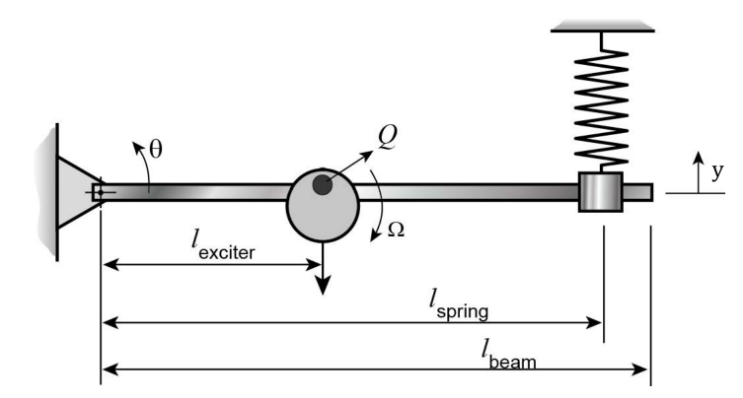

Assuming there are no base excitations, let consider the external load on the beam to be:

$$
q(x,t) = Q \sin{\Omega t} ⋅ \delta(x - l_{exciter})
$$

The system can be modelled as decoupled forced, damped 1-DOF oscillators for each mode k in the following form:

$$
\ddot{y} + C\dot{y} + Hy = q(x,t) \ \ \Rightarrow \ \ m_k\ddot{z}_k+2\zeta_k\omega_km_k\dot{z}_k+ m_k\omega_k^2z_k =\langle\langle\psi_k(x),q(x,t)\rangle\rangle
$$

where $\zeta_k=\frac{C}{2\omega_k}$ and $m_k = \int_0^{l_\text{beam}} \rho A \, \psi_k^2(x)\,dx$

Modal masses normalise the arbitary scaling caused by the selection of $B_k$ and $D_k$ values.

Then, solving the decoupled ODE of each $k$ yields,

$$
z_k(t) = \chi_k(\Omega)\cos{(\Omega t+\phi_k(\Omega))}
$$

where $\chi_k(\Omega)$ is the steady-state amplitude and $\phi_k(\Omega)$ is the phase lag for the $k^{th}$ modal coordinate at forcing frequency $\Omega$.


Let us derive expressions for above definitions:

The mode shapes are orthonormal with respect to the inner product defined by:

\begin{align*}\langle\langle \psi_k(x),q(x)\rangle \rangle &= \int_0^{l_{beam}}\psi_k(x)q(x)\,dx \\
\langle\langle \psi_k(x),q(x)\rangle \rangle &= \int_0^{l_{beam}}\psi_k(x) Q \sin{(\Omega t)} \delta(x - l_{exciter})\,dx \\
&= Q \sin{(\Omega t)} \int_0^{l_{beam}}\psi_k(x) \delta(x - l_{exciter})\,dx \\
&= Q \sin{(\Omega t)} \psi_k(l_{exciter})
\end{align*}

By definition,

\begin{align*}
\chi_k(\Omega) & = \left|\frac{\langle\langle \psi_k(x),q(x)\rangle \rangle}{ m_k\sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}}\right| \\
\chi_k(\Omega) & = \left|\frac{Q \psi_k(l_{exciter})}{m_k\sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}}\right| \\
\end{align*}

and

$$
\phi_k(\Omega) =\arctan{\left(\frac{2\zeta_k\Omega\omega_k}{\omega_k^2 - \Omega^2}\right)}
$$

Then, the **infinite dimensional solution** for this setup can be given by:

\begin{align*}
y(t,x)=\sum_{k=1}^\infty z_k(t)\psi_k(x)=\sum_{k=1}^\infty\chi_k(\Omega)\cos{(\Omega t+\phi_k(\Omega))}\psi_k(x)
\end{align*}

**Reduction to 2-DOF Model with Localised Spring–Damper Attachment:**

Truncating the infinite-dimensional solution to the first two dominant modes, the displacement can be approximated as:

\begin{align*}
y(t,x) \approx \chi_1(\Omega) \cos(\Omega t + \phi_1(\Omega)) \, \psi_1(x)
+ \chi_2(\Omega) \cos(\Omega t + \phi_2(\Omega)) \, \psi_2(x)
\end{align*}

The corresponding 2-DOF system in matrix form is given by,

\begin{align*}
\underbrace{\begin{bmatrix} m_1 & 0 \\ 0 & m_2 \end{bmatrix}}_{M_\text{beam}}
\begin{bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} 2 \zeta_1 \omega_1 m_1 & 0 \\ 0 & 2 \zeta_2 \omega_2 m_2 \end{bmatrix}}_{C_\text{beam}}
\begin{bmatrix} \dot{z}_1 \\ \dot{z}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} \omega_1^2 m_1 & 0 \\ 0 & \omega_2^2 m_2 \end{bmatrix}}_{K_\text{beam}}
\begin{bmatrix} z_1 \\ z_2 \end{bmatrix}
=
\underbrace{\begin{bmatrix} Q \psi_1(l_{exciter}) \sin{(\Omega t)} \\[1mm] Q \psi_2(l_{exciter}) \sin{(\Omega t)} \end{bmatrix}}_{F_{exciter}}
\end{align*}


Let us now account for the spring and viscous damper attachments.

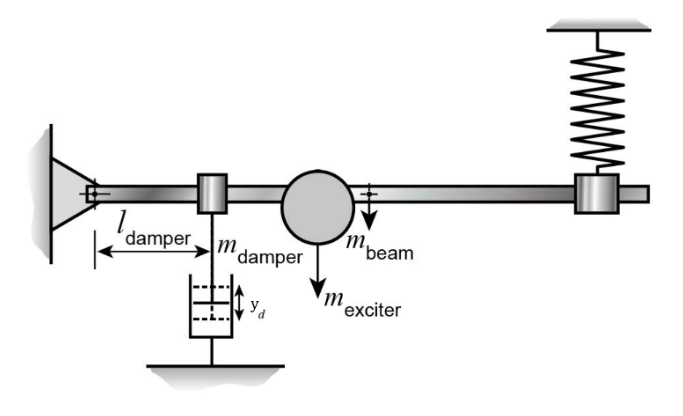

**Part I: Consideration of Additional Masses**

For accuracy, the theory allows for a proportion of the spring mass - that part which moves and contributes to the overall mass of the system. According to **Rayleigh's Theory**, this is equal to 1/3 the mass of the spring. The fixing between the spring and the beam also needs to be allowed for.

$$
m_{\text{eff}} = \frac{1}{3} m_{\text{spring}} + m_{\text{fixed}}
$$

The transverse acceleration at the attachment point is:

\begin{align*}
\ddot y(l_{\text{spring}},t)
=
\ddot z_1(t)\psi_1(l_{\text{spring}})
+ \ddot z_2(t)\psi_2(l_{\text{spring}})
\end{align*}

The inertia force exerted by the attached mass is:

\begin{align*}
F_{\text{inertia}}(t)
=
m_{\text{eff}}
\ddot y(l_{\text{spring}},t)
\end{align*}

Projecting this force onto the modal coordinates gives:

\begin{align*}
\begin{bmatrix}
F^{(m)}_1 \\
F^{(m)}_2
\end{bmatrix}
=
M_{\text{spring}}
\begin{bmatrix}
\ddot z_1 \\
\ddot z_2
\end{bmatrix}
\end{align*}

where the additional mass matrix is

\begin{align*}
M_{\text{spring}}
=
m_{\text{eff}}
\begin{bmatrix}
\psi_1^2(l_{\text{spring}}) &
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) \\
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) &
\psi_2^2(l_{\text{spring}})
\end{bmatrix}
\end{align*}

Similarly, additional masses of damper and exciter can be written as:

$$
M_{\text{damper}} =
m_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
$$

$$
M_{\text{exciter}} =
m_{\text{exciter}}
\begin{bmatrix}
\psi_1^2(l_{\text{exciter}}) &
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) \\
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) &
\psi_2^2(l_{\text{exciter}})
\end{bmatrix}
$$

<br>

**Part II: Consideration of Damper Attachment**



By applying the constitutive relation for a viscous damper,

\begin{align*}
F_{\text{damper}}(t) = c_{\text{damper}} \dot{y}(l_{\text{damper}},t)
\end{align*}

Using the two-mode approximation,

\begin{align*}
\dot y(l_{\text{damper}},t) = \dot z_1(t)\psi_1(l_{\text{damper}})+\dot z_2(t)\psi_2(l_{\text{damper}})
\end{align*}

The modal force acting on the $k^{\text{th}}$ mode is obtained by projection:

\begin{align*}
F^{(c)}_k(t) = c_{\text{damper}}\left(\dot{z_1}\psi_1(l_{\text{damper}}) +\dot{z_2}\psi_2(l_{\text{damper}})\right)\psi_k(l_{\text{damper}})
\end{align*}

This yields the matrix form:

\begin{align*}
\begin{bmatrix}
F^{(c)}_1 \\
F^{(c)}_2
\end{bmatrix} = C_{\text{damper}}
\begin{bmatrix}
\dot z_1 \\
\dot z_2
\end{bmatrix}
\end{align*}

where

\begin{align*}
C_{\text{damper}} =
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
\end{align*}

Dynamic and inertial contributions of spring, damper and exciter now can be included the 2-DOF system.

The final reduced system equation is given by:

$$
(\mathbf{M_\text{beam}} + \mathbf{M_\text{spring}} + \mathbf{M_\text{damper}} + \mathbf{M_\text{exciter}}) \mathbf{\ddot{z}} + (\mathbf{C_\text{beam} + \mathbf{C_{\text{damper}}}})\mathbf{\dot{z}} + \mathbf{K_{\text{beam}}}\mathbf{z} = \mathbf{F_{\text{exciter}}}
$$

where $\mathbf{M}, \mathbf{C}, \mathbf{K} \in \mathbb{M_{2x2}}$ and $\mathbf{F}, \mathbf{z} \in \mathbb{R_2}$

In [ ]:
# ================= Beam Specifications =================
breadth = 0.025          # Width of beam (m)
thickness = 0.01         # Height of beam (m)
cross_section_area = breadth * thickness  # Area (m^2)
beam_mass = 1.65         # Total beam mass (m)
beam_length = 0.815      # Length of beam (m)
elastic_modulus = 2e+11  # Young's Modulus (Pa)
second_moment_area = breadth * thickness**3 / 12  # Moment of inertia (m^4)
material_density = beam_mass / (cross_section_area * beam_length)  # Material density (kg/m^3)

# ================= Spring Characteristics ==============
spring_stiffness = 3800  # Stiffness coefficient (N/m)
spring_position = 0.75   # Distance from base (m)
spring_mass = 0.388      # Mass of spring (kg)
attached_mass = 0.009    # Additional fixed mass (kg)

# Equivalent torsional spring at base
torsional_stiffness = spring_stiffness * spring_position**2

# ================= Damper Characteristics ==============
damper_position = 0.2    # Distance from base (m)
damper_mass = 0.53       # Associated mass (kg)

# ================= Excitation System =============
exciter_mass = 4.2       # Mass of exciter (kg)
exciter_position = 0.4   # Distance from base (m)

In [ ]:
# ================= Calculate first two beta values =================
beta_solutions = compute_eigenvalues(beam_length, elastic_modulus*second_moment_area, torsional_stiffness, num_modes=2)
first_beta, second_beta = beta_solutions
print(f"first_beta = {first_beta:.4f}, second_beta = {second_beta:.4f}")

# ================= Mode shape evaluation function =================
def mode_shape(position, beta_val, length, flexural_rigidity, k_rot):
    coeff_A, coeff_B, coeff_C, coeff_D = extract_mode_coefficients(beta_val, length, flexural_rigidity, k_rot)
    return coeff_A*np.cosh(beta_val*position) + coeff_B*np.sinh(beta_val*position) + coeff_C*np.cos(beta_val*position) + coeff_D*np.sin(beta_val*position)

# ================= Calculate mode shapes at key locations =================
mode1_at_spring = mode_shape(spring_position, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)
mode2_at_spring = mode_shape(spring_position, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)

mode1_at_damper = mode_shape(damper_position, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)
mode2_at_damper = mode_shape(damper_position, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)

mode1_at_exciter = mode_shape(exciter_position, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)
mode2_at_exciter = mode_shape(exciter_position, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)

print(f"mode1(spring_pos) = {mode1_at_spring:.4f}, mode2(spring_pos) = {mode2_at_spring:.4f}")
print(f"mode1(damper_pos) = {mode1_at_damper:.4f}, mode2(damper_pos) = {mode2_at_damper:.4f}")
print(f"mode1(exciter_pos) = {mode1_at_exciter:.4f}, mode2(exciter_pos) = {mode2_at_exciter:.4f}")

# ================= Calculate modal masses =================
def compute_modal_mass(beta_value):
    """Calculate integral of density*area*mode_shape^2 over beam length"""
    mode_squared = lambda pos: material_density * cross_section_area * mode_shape(pos, beta_value, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)**2
    mass_integral, _ = quad(mode_squared, 0, beam_length)
    return mass_integral

modal_mass_1 = compute_modal_mass(first_beta)
modal_mass_2 = compute_modal_mass(second_beta)

# ================= Compute natural frequencies (Beam only system) =================
angular_freq_1 = (first_beta**2) * np.sqrt(elastic_modulus*second_moment_area/(material_density*cross_section_area))
angular_freq_2 = (second_beta**2) * np.sqrt(elastic_modulus*second_moment_area/(material_density*cross_section_area))

print(f"Modal mass modal_mass_1 = {modal_mass_1:.4f} kg, modal_mass_2 = {modal_mass_2:.4f} kg")
print(f"Beam natural frequencies: angular_freq_1 = {angular_freq_1:.4f} rad/s, angular_freq_2 = {angular_freq_2:.4f} rad/s")


Searching for 2 eigenvalues...
Search range: [1e-4, 50]
  Mode 1: β_1 = 1.941735
  Mode 2: β_2 = 5.194227

Successfully found all 2 eigenvalues.
first_beta = 1.9417, second_beta = 5.1942
mode1(spring_pos) = -1.3706, mode2(spring_pos) = -0.8789
mode1(damper_pos) = -0.2491, mode2(damper_pos) = 0.7102
mode1(exciter_pos) = -0.6133, mode2(exciter_pos) = 0.8923
Modal mass modal_mass_1 = 1.0818 kg, modal_mass_2 = 0.7688 kg
Beam natural frequencies: angular_freq_1 = 54.0892 rad/s, angular_freq_2 = 387.0553 rad/s


In [ ]:
# ========= BEAM SYSTEM MATRICES =========
beam_mass_matrix = np.array([[modal_mass_1, 0.0],
                              [0.0, modal_mass_2]])
beam_stiffness_matrix = np.array([[modal_mass_1 * angular_freq_1**2, 0.0],
                                   [0.0, modal_mass_2 * angular_freq_2**2]])

# ========= SPRING CONTRIBUTION =========
effective_spring_mass = (1/3) * spring_mass + attached_mass
spring_mass_matrix = effective_spring_mass * np.array([[mode1_at_spring**2, mode1_at_spring * mode2_at_spring],
                                                        [mode1_at_spring * mode2_at_spring, mode2_at_spring**2]])

# ========= DAMPER CONTRIBUTION =========
damper_mass_matrix = damper_mass * np.array([[mode1_at_damper**2, mode1_at_damper * mode2_at_damper],
                                              [mode1_at_damper * mode2_at_damper, mode2_at_damper**2]])

# ========= EXCITER CONTRIBUTION =========
exciter_mass_matrix = exciter_mass * np.array([[mode1_at_exciter**2, mode1_at_exciter * mode2_at_exciter],
                                                [mode1_at_exciter * mode2_at_exciter, mode2_at_exciter**2]])

def display_matrix(matrix_name, matrix_data):
    print(f"{matrix_name}:")
    for row_data in matrix_data:
        print("  [" + ", ".join(f"{element:10.3f}" for element in row_data) + "]")
    print()  # Add spacing between matrices

display_matrix("beam_mass_matrix", beam_mass_matrix)
display_matrix("spring_mass_matrix", spring_mass_matrix)
display_matrix("damper_mass_matrix", damper_mass_matrix)
display_matrix("exciter_mass_matrix", exciter_mass_matrix)
display_matrix("beam_stiffness_matrix", beam_stiffness_matrix)

beam_mass_matrix:
  [     1.082,      0.000]
  [     0.000,      0.769]

spring_mass_matrix:
  [     0.260,      0.167]
  [     0.167,      0.107]

damper_mass_matrix:
  [     0.033,     -0.094]
  [    -0.094,      0.267]

exciter_mass_matrix:
  [     1.580,     -2.298]
  [    -2.298,      3.344]

beam_stiffness_matrix:
  [  3164.958,      0.000]
  [     0.000, 115171.455]



**Activity 2: Estimation of Damping Ratios of the Two Dominant Modes**

Recall the governing equation of the system with the attachments.

$$
 \mathbf{M}\mathbf{\ddot{z}} + \mathbf{C}\mathbf{\dot{z}} + \mathbf{K}\mathbf{z} = \mathbf{F_{\text{exciter}}}
$$

where $\mathbf{M} = \mathbf{M_\text{beam}} + \mathbf{M_\text{spring}} + \mathbf{M_\text{damper}} + \mathbf{M_\text{exciter}}$, $\mathbf{C} = \mathbf{C_\text{beam} + \mathbf{C_{\text{damper}}}} $ and $\mathbf{K} = \mathbf{K_{\text{beam}}}$




Comsider the free vibration solution to the above dynamic equation:

$$
\mathbf{M}\mathbf{\ddot{z}} +\mathbf{C}\mathbf{\dot{z}} + \mathbf{K}\mathbf{z} = 0
$$

Assume the solution to be $\mathbf{z}(t) = 𝛟 \,e^{j \omega t}$ and consider the undamped response of the system to find the natural frequencies and mode shapes of the system.

\begin{align*}
(\mathbf{K}-\omega^2\mathbf{M})\,\phi = 0 \\
\text{det}(\mathbf{K}-\omega^2\mathbf{M}) = 0
\end{align*}

Solving above eigenvalue problem gives two natural frequencies $\omega_1, \omega_2$ and corresponding eigenvectors $\phi_1, \phi_2$, where $\phi \in \mathbb{R_2}$

Let the modal matrix be:

$$
\Phi = \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix}
$$

Let us calculate the numerical values for above parameters.

In [ ]:
# ================= Natural frequencies (Complete System) =================
total_mass_matrix = beam_mass_matrix + spring_mass_matrix + damper_mass_matrix + exciter_mass_matrix
total_stiffness_matrix = beam_stiffness_matrix

eigenvalues, eigenvectors = eigh(total_stiffness_matrix, total_mass_matrix)
natural_frequencies = np.sqrt(eigenvalues)

print("System natural frequencies with all attachments:")
for mode_index, frequency in enumerate(natural_frequencies, 1):
    print(f"Mode {mode_index}: {frequency:.3f} rad/s = {frequency/(2*np.pi):.3f} Hz")

modal_matrix = eigenvectors
display_matrix("modal_matrix", modal_matrix)

System natural frequencies with all attachments:
Mode 1: 32.472 rad/s = 5.168 Hz
Mode 2: 204.048 rad/s = 32.475 Hz
modal_matrix:
  [    -0.573,      0.461]
  [     0.012,      0.596]



Consider the new coordinate vector $\mathbf{q}(t)$ such that:

$$
\mathbf{z}(t) = \Phi \,\mathbf{q}(t)
$$

We can write the forced vibration equation:

$$
\mathbf{M}\Phi\mathbf{\ddot{q}} +\mathbf{C}\Phi\mathbf{\dot{q}} + \mathbf{K}\Phi\mathbf{q} = \mathbf{F_{exciter}}
$$

By left multipying with $\Phi^T$, modal matrices are defined as:

$$
\underbrace{\mathbf{\Phi}^T\mathbf{M}\mathbf{\Phi}}_{\mathbf{M}_m}\mathbf{\ddot{q}} + \underbrace{\mathbf{\Phi}^T\mathbf{C}\mathbf{\Phi}}_{\mathbf{C}_m}\mathbf{\dot{q}} + \underbrace{\mathbf{\Phi}^T\mathbf{K}\mathbf{\Phi}}_{\mathbf{K}_m}\mathbf{q} = \underbrace{\mathbf{\Phi}^T\mathbf{F_{exciter}}}_{\mathbf{F}_m}
$$

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\mathbf{C_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = \mathbf{F_m}
$$
<br>
For the undamped eigenvectors of $(\mathbf{K}, \mathbf{M})$, we know $\mathbf{M_m}$ and $\mathbf{K_m}$ is diagonal.

For free vibration response:

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\mathbf{C_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = 0
$$

In new modal equation, each mode behaves like a 1-DOF oscillator if damping does not introduce coupling. i.e. $\mathbf{C_m}$ is also diagonal.

From $\zeta_k = \frac{c}{2m_k\omega_k}$, we can deduce the modal damping ratio for complete system as:

$$
\zeta_k = \frac{\phi_k^T \mathbf{C} \phi_k}{2\omega_k\phi_k^T \mathbf{M} \phi_k} \tag{2}
$$

Since $\mathbf{C} = \mathbf{C_{beam}} + \mathbf{C_{damper}}$ is unknown, we need a create damping model.

We already know that $\mathbf{C_{beam}}$ is diagonal from modal reduction of beam alone, and $\mathbf{C_{damper}}$ is given by:

\begin{align*}
C_{\text{damper}} =
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
\end{align*}

Consider the mode shapes of the beam alone:

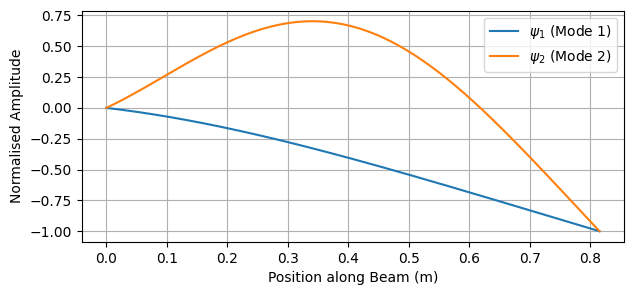

In [ ]:
# ================= Beam Mode Shape Visualization =================
beam_positions = np.linspace(0, beam_length, 1000)

first_mode_shape = mode_shape(beam_positions, first_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)
second_mode_shape = mode_shape(beam_positions, second_beta, beam_length, elastic_modulus*second_moment_area, torsional_stiffness)

normalized_mode1 = first_mode_shape / np.max(np.abs(first_mode_shape))
normalized_mode2 = second_mode_shape / np.max(np.abs(second_mode_shape))

plt.figure(figsize=(7, 3))
plt.plot(beam_positions, normalized_mode1, label=r'$\psi_1$ (Mode 1)')
plt.plot(beam_positions, normalized_mode2, label=r'$\psi_2$ (Mode 2)')

plt.xlabel('Position along Beam (m)')
plt.ylabel('Normalised Amplitude')
plt.grid(True)
plt.legend()
plt.show()

From the above results, we can assume that at $l_{damper} = 0.2\,m,\,\, |\psi_1(l_{damper})| << |\psi_2(l_{damper})|$. To be precise, we have already computed that $\psi_1(l_{damper}) = -0.2491$ and $\psi_2(l_{damper}) = 0.7102$. Then,

$$
\psi_2^2(l_{damper}) = 0.5044 \:\:\:\:\:\:\: \psi_1(l_{damper})\psi_2(l_{damper}) = -0.1769
$$

<br>

Therefore, $|\psi_1(l_{damper})| << |\psi_2(l_{damper})|$ and the off-diagonal terms of $C_{damper}$ can be neglected. i.e. the coupling is small.

Hence, assume **Reyleigh Proportional Damping** for the system:

$$
\mathbf{C} = \alpha\,\mathbf{M} + \beta\,\mathbf{K}
$$

Then,

$$
\phi_k^T\mathbf{C}\phi_k = \alpha\,\phi_k^T\mathbf{M}\phi_k + \beta\,\phi_k^T\mathbf{K}\phi_k \tag{3}
$$

Recall:

\begin{align*}
(\mathbf{K}-\omega^2\mathbf{M})\,\phi &= 0 \\
\phi_k^T\mathbf{K}\phi_k &= \omega_k^2\phi_k^T\mathbf{M}\phi_k
\end{align*}

Back substitute to $(3)$:

\begin{align*}
\phi_k^T\mathbf{C}\phi_k &= \alpha\,\phi_k^T\mathbf{M}\phi_k + \beta\,(\omega_k^2\phi_k^T\mathbf{M}\phi_k) \\
\phi_k^T\mathbf{C}\phi_k &= (\alpha\ + \beta\,\omega_k^2) \phi_k^T\mathbf{M}\phi_k
\end{align*}

Back substitute to $(2)$:

$$
\zeta_k = \frac{(\alpha\ + \beta\,\omega_k^2) \phi_k^T\mathbf{M}\phi_k}{2\omega_k\phi_k^T \mathbf{M} \phi_k}
$$

$$
\zeta_k = \frac{1}{2} (\frac{\alpha}{\omega_k}+\beta\omega_k)
$$

Since $|\psi_1(l_{beam})| << |\psi_2(l_{beam})|$, the damper is closer to the second mode antinode and the first mode node. This means it predominantly affects the second mode, that is the high frequency mode.

Therefore, we can assume stiffness proportional damping for this system ($\zeta_2 > \zeta_1$). Take $\alpha = 0$.

$$
\zeta_k = \frac{\beta \omega_k}{2}
$$



Since the maximum operating frequency of the exciter in the experimental setup is 17 Hz and $\omega_2$ > 17 Hz, we can only experimentally estimate $\zeta_1$ at $\omega_1$. Using that relationship, $\zeta_2$ can be found.

$$
\zeta_1 = \frac{\beta \omega_1}{2} \:\:\:\:\:\:\:\ \text{and} \:\:\:\:\:\:\:\ \zeta_2 = \frac{\beta \omega_2}{2}
$$

$$
\zeta_2 = \zeta_1 \frac{\omega_2}{\omega_1}
$$

Consider the damped natural response at the supposed first mode as observed.
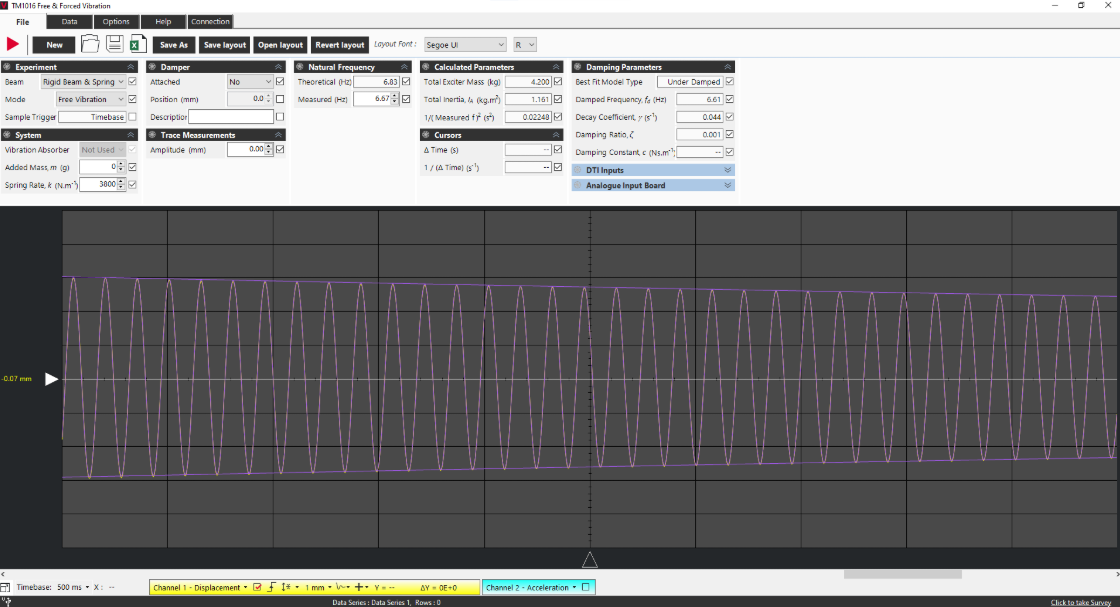

Since the initial displacement was applied at the free end of the beam, the free-decay response is dominated by the first mode, which has its maximum displacement (antinode) at the free end.

Therefore, we can deduce that the damping ratio observed in above response is $\zeta_1$.

\begin{align*}
\zeta_2 &= \zeta_1 \frac{\omega_2}{\omega_1}\\
\zeta_2 &= 0.008 \times \frac{204.048\,\,\text{rad/s}}{32.472\,\,\text{rad/s}}\\
\zeta_2 &= 0.05
\end{align*}



Therefore, estimated damping ratios for first two dominant modes:

$$
\zeta_1 = 0.008 \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\: \zeta_2 = 0.05
$$

**Activity 3: Graphical Representation of Selected Parameters**

**3.1 The Unforced Repsonse to an Initiail Diplacement of the Spring End of the Beam**